In [1]:
import pandas as pd
import seaborn as sns
import json
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df1 = pd.read_json('/content/drive/MyDrive/1_문항정오답표.json')
df2 = pd.read_json('/content/drive/MyDrive/2_문항IRT.json')
df3 = pd.read_json('/content/drive/MyDrive/3_응시자IRT.json')

### **문항정오답표**
- learnerID : 학생 ID
- learnerProfile : 학생 정보 (Gender;학년등급;학년)
- testID : 시험지 ID
- assessmentItemID : 문제 ID
- answerCode : 채점결과 (0:틀림, 1:맞음)
- Timestamp : 응시 일자

---

###**문항IRT**
- testID : 시험지ID
- assessmentItemID : 문제 ID
- difficultyLevel : 난이도 (-5~5)
- discriminationLevel : 변별도 (0~∞)
- guessLevel : 추측도(0~1)
- Timestamp : 데이터 생성 일자
- knowledgeTag : 지식체계번호

---

###**응시자IRT**
- learnerID : 학생 ID
- learnerProfile : 학생 정보
- testID : 시험지 ID
- theta : testID 에 대한 응시자의 능력 수준(-5~5)
- realScore : 진점수
- Timestamp : 데이터 생성 일자

In [4]:
df1.head()

,learnerID,learnerProfile,testID,assessmentItemID,answerCode,Timestamp
0,A080001187,M;S01;8,A080000038,A080038004,1,2020-06-07 23:07:23
1,A020002315,F;S01;2,A020000182,A020182005,1,2020-10-21 10:14:02
2,A060000089,F;S01;6,A060000003,A060003002,1,2020-03-26 05:52:10
3,A090000220,F;S01;9,A090000024,A090024007,1,2020-05-07 23:49:52
4,A040000243,M;S01;4,A040000134,A040134004,1,2020-08-07 02:47:13


In [5]:
df2.head()

,testID,assessmentItemID,difficultyLevel,discriminationLevel,guessLevel,Timestamp,knowledgeTag
0,A010000059,A010059006,-0.684622,1.398660,5.967000e-07,2020-10-06 10:45:57,7601
1,A090000024,A090024002,0.450468,4.460122,2.381760e-05,2020-12-14 20:16:37,10169
2,A030000160,A030160002,-0.390290,1.961060,2.142000e-07,2020-10-26 09:52:52,1726
3,A050000017,A050017006,-1.332508,1.651489,7.502948e-04,2020-09-15 10:41:34,2620
4,A090000058,A090058006,0.085875,17.158927,1.148290e-01,2020-11-24 04:15:37,9927


In [6]:
df3.head()

,learnerID,learnerProfile,testID,theta,realScore,Timestamp
0,A010000001,F;S01;1,A010000001,0.196765,0.967829,2021-01-08 06:08:25.336946
1,A010000002,M;S01;1,A010000001,0.196765,0.967829,2021-01-08 06:08:25.336946
2,A010000003,F;S01;1,A010000001,0.196765,0.967829,2021-01-08 06:08:25.336946
3,A010000006,F;S01;1,A010000001,-1.359208,0.791475,2021-01-08 06:08:25.336946
4,A010000007,M;S01;1,A010000001,0.196765,0.967829,2021-01-08 06:08:25.336946


In [7]:
print(df1.shape, df2.shape, df3.shape)

(2526700, 6) (9454, 7) (415300, 6)


In [4]:
df1 = df1.drop('testID', axis=1)
df2 = df2.drop('Timestamp',axis=1)
df3 = df3.drop('Timestamp',axis=1)
df3 = df3.drop('learnerProfile', axis=1)

In [5]:
df4 = pd.merge(df3,df2,how='left', on='testID')
df4 = df4.drop('testID', axis=1)
df4.head()

,learnerID,theta,realScore,assessmentItemID,difficultyLevel,discriminationLevel,guessLevel,knowledgeTag
0,A010000001,0.196765,0.967829,A010001002,-2.917577,1.349719,0.012780,5844
1,A010000001,0.196765,0.967829,A010001001,-3.719715,0.721179,0.010089,5844
2,A010000001,0.196765,0.967829,A010001005,-1.611647,1.911265,0.000235,5844
3,A010000001,0.196765,0.967829,A010001003,-2.273138,1.192981,0.050128,5844
4,A010000001,0.196765,0.967829,A010001004,-2.302867,1.732754,0.006224,5844


In [6]:
df5 = df1.sort_values(['learnerID','assessmentItemID'])
df4 = df4.sort_values(['learnerID','assessmentItemID'])

In [7]:
df5 = df5.reset_index()
df5 = df5.drop('index', axis=1)
df5.head()

,learnerID,learnerProfile,assessmentItemID,answerCode,Timestamp
0,A010000001,F;S01;1,A010001001,1,2020-04-02 08:14:15
1,A010000001,F;S01;1,A010001002,1,2020-04-02 08:14:35
2,A010000001,F;S01;1,A010001003,1,2020-04-02 08:14:47
3,A010000001,F;S01;1,A010001004,1,2020-04-02 08:15:59
4,A010000001,F;S01;1,A010001005,1,2020-04-02 08:16:32


In [8]:
df4 = df4.reset_index()
df4 = df4.drop('index', axis=1)
df4 = df4.rename(columns={df4.columns[0]:'learn',df4.columns[3]:'asses'})
df4.head()

,learn,theta,realScore,asses,difficultyLevel,discriminationLevel,guessLevel,knowledgeTag
0,A010000001,0.196765,0.967829,A010001001,-3.719715,0.721179,0.010089,5844
1,A010000001,0.196765,0.967829,A010001002,-2.917577,1.349719,0.012780,5844
2,A010000001,0.196765,0.967829,A010001003,-2.273138,1.192981,0.050128,5844
3,A010000001,0.196765,0.967829,A010001004,-2.302867,1.732754,0.006224,5844
4,A010000001,0.196765,0.967829,A010001005,-1.611647,1.911265,0.000235,5844


In [9]:
df = pd.concat([df5,df4],axis=1)
df.head()

,learnerID,learnerProfile,assessmentItemID,answerCode,Timestamp,learn,theta,realScore,asses,difficultyLevel,discriminationLevel,guessLevel,knowledgeTag
0,A010000001,F;S01;1,A010001001,1,2020-04-02 08:14:15,A010000001,0.196765,0.967829,A010001001,-3.719715,0.721179,0.010089,5844
1,A010000001,F;S01;1,A010001002,1,2020-04-02 08:14:35,A010000001,0.196765,0.967829,A010001002,-2.917577,1.349719,0.012780,5844
2,A010000001,F;S01;1,A010001003,1,2020-04-02 08:14:47,A010000001,0.196765,0.967829,A010001003,-2.273138,1.192981,0.050128,5844
3,A010000001,F;S01;1,A010001004,1,2020-04-02 08:15:59,A010000001,0.196765,0.967829,A010001004,-2.302867,1.732754,0.006224,5844
4,A010000001,F;S01;1,A010001005,1,2020-04-02 08:16:32,A010000001,0.196765,0.967829,A010001005,-1.611647,1.911265,0.000235,5844


In [14]:
print((df['learnerID']==df['learn']).sum(), (df['assessmentItemID']==df['asses']).sum())

2526700 2526700


In [10]:
df = df.drop('learn',axis=1)
df = df.drop('asses',axis=1)
df.head()

,learnerID,learnerProfile,assessmentItemID,answerCode,Timestamp,theta,realScore,difficultyLevel,discriminationLevel,guessLevel,knowledgeTag
0,A010000001,F;S01;1,A010001001,1,2020-04-02 08:14:15,0.196765,0.967829,-3.719715,0.721179,0.010089,5844
1,A010000001,F;S01;1,A010001002,1,2020-04-02 08:14:35,0.196765,0.967829,-2.917577,1.349719,0.012780,5844
2,A010000001,F;S01;1,A010001003,1,2020-04-02 08:14:47,0.196765,0.967829,-2.273138,1.192981,0.050128,5844
3,A010000001,F;S01;1,A010001004,1,2020-04-02 08:15:59,0.196765,0.967829,-2.302867,1.732754,0.006224,5844
4,A010000001,F;S01;1,A010001005,1,2020-04-02 08:16:32,0.196765,0.967829,-1.611647,1.911265,0.000235,5844


In [11]:
df_split = df.learnerProfile.str.split(';',expand=True)
df_split.columns = ['gender','b','grade']
df = pd.concat([df, df_split],axis=1)
df = df.drop('learnerProfile',axis=1)
df = df.drop('b',axis=1)
df = df.drop('learnerID',axis=1)
df = df.drop('assessmentItemID',axis=1)
# 학생 특성 셀 나누기

In [12]:
df['grade'] = df['grade'].astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2526700 entries, 0 to 2526699
Data columns (total 10 columns):
 #   Column               Dtype         
---  ------               -----         
 0   answerCode           int64         
 1   Timestamp            datetime64[ns]
 2   theta                float64       
 3   realScore            float64       
 4   difficultyLevel      float64       
 5   discriminationLevel  float64       
 6   guessLevel           float64       
 7   knowledgeTag         int64         
 8   gender               object        
 9   grade                int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 192.8+ MB


In [13]:
!pip install category_encoders
!pip install pandas-profiling==3.1.0
!pip3 install scipy-stack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 4.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 261 kB 5.6 MB/s 
     |████████████████████████████████| 596 kB 40.7 MB/s 
     |████████████████████████████████| 690 kB 23.9 MB/s 
     |████████████████████████████████| 3.1 MB 32.8 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 303 kB 9.7 MB/s 
     |████████████████████████████████| 102 kB 4.1 MB/s 
     |████████████████████████████████| 812 kB 43.2 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=15ee2afce95c4c4da2def55e86497a6b3aaf5e7aab8bb4edabb91c072312144d
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imageha

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 6.9 MB/s 


In [14]:
target = 'answerCode'

df_s = df.sort_values(['Timestamp'])
df_s = df_s.reset_index()
df_s = df_s.drop('index', axis=1)
df_s
train, test = train_test_split(df_s, train_size=0.80, test_size=0.20, shuffle=False)
train, val = train_test_split(train, train_size=0.80, test_size=0.20, shuffle=False)
train

# 시간 순서 정렬 후, 최근 데이터 20% test 셋 생성, 남은 데이터의 최근 20% val 셋 생성

,answerCode,Timestamp,theta,realScore,difficultyLevel,discriminationLevel,guessLevel,knowledgeTag,gender,grade
0,1,2019-12-31 15:08:01,0.574639,0.715740,-1.479204,2.693081,3.400000e-09,7229,M,6
1,1,2019-12-31 15:08:21,0.574639,0.715740,-1.347461,4.063459,3.620000e-08,7229,M,6
2,1,2019-12-31 15:08:55,0.574639,0.715740,0.566275,1.834214,9.699000e-07,7229,M,6
3,1,2019-12-31 15:09:13,0.574639,0.715740,-0.361558,1.263308,8.770000e-08,7229,M,6
4,0,2019-12-31 15:09:29,0.574639,0.715740,0.955883,2.052489,1.700000e-08,7229,M,6
...,...,...,...,...,...,...,...,...,...,...
1617083,1,2020-08-29 11:25:23,0.065459,0.795655,-2.201745,1.729378,4.500000e-09,7600,F,1
1617084,1,2020-08-29 11:26:09,-1.722667,0.680650,-2.427586,1.430048,9.180054e-30,8004,F,2
1617085,1,2020-08-29 11:26:14,1.028057,0.883623,0.337000,1.974001,4.658800e-06,574,F,3
1617086,0,2020-08-29 11:26:18,-1.722667,0.680650,-1.702950,2.288125,3.208000e-06,8004,F,2


In [21]:
from pandas_profiling import ProfileReport
profile = ProfileReport(train, minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
features = train.drop(columns=[target]).columns
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [16]:
X_train.replace({'gender':{'F' : 1, 'M' : 0}}, inplace = True)
X_train = X_train.drop('Timestamp',axis=1)
X_val.replace({'gender':{'F' : 1, 'M' : 0}}, inplace = True)
X_val = X_val.drop('Timestamp',axis=1)
X_train.head()
# gender열 원핫인코딩

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,theta,realScore,difficultyLevel,discriminationLevel,guessLevel,knowledgeTag,gender,grade
0,0.574639,0.71574,-1.479204,2.693081,3.400000e-09,7229,0,6
1,0.574639,0.71574,-1.347461,4.063459,3.620000e-08,7229,0,6
2,0.574639,0.71574,0.566275,1.834214,9.699000e-07,7229,0,6
3,0.574639,0.71574,-0.361558,1.263308,8.770000e-08,7229,0,6
4,0.574639,0.71574,0.955883,2.052489,1.700000e-08,7229,0,6


In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1617088 entries, 0 to 1617087
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   theta                1617088 non-null  float64
 1   realScore            1617088 non-null  float64
 2   difficultyLevel      1617088 non-null  float64
 3   discriminationLevel  1617088 non-null  float64
 4   guessLevel           1617088 non-null  float64
 5   knowledgeTag         1617088 non-null  int64  
 6   gender               1617088 non-null  int64  
 7   grade                1617088 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 111.0 MB


In [17]:
# 기준모델 mode
major = y_train.mode()[0]
y_pred=[major]*len(y_train)

from sklearn.metrics import accuracy_score
print('검증 정확도: ', accuracy_score(y_train, y_pred))

#기준모델의 검증 정확도 66%

검증 정확도:  0.6613375400720307


In [27]:
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline

pipe2 = make_pipeline(XGBClassifier(n_jobs=-1,
                                    learning_rate=0.2))
pipe2.fit(X_train, y_train)

y_pred2 = pipe2.predict(X_val)
print('xgboost 검증 정확도: ', accuracy_score(y_val, y_pred2))

xgboost 검증 정확도:  0.8649572565005739


In [28]:
from sklearn.ensemble import RandomForestClassifier


pipe = make_pipeline(
    RandomForestClassifier(n_jobs=-1, random_state=28, oob_score=True)
)

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_val)
print('Random Forest 검증 정확도: ', accuracy_score(y_val, y_pred))

Random Forest 검증 정확도:  0.9320135948074564


In [30]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax)
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


In [31]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

dists = {
    'randomforestclassifier__n_estimators': randint(50, 500),
    'randomforestclassifier__max_depth': [5, 10, 15, 20, None],
    'randomforestclassifier__max_features': uniform(0, 1)
}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=2, 
    cv=2, 
    scoring='accuracy',  
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);

Fitting 2 folds for each of 2 candidates, totalling 4 fits


In [32]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('MAE: ', -clf.best_score_)

최적 하이퍼파라미터:  {'randomforestclassifier__max_depth': 20, 'randomforestclassifier__max_features': 0.7273335939652188, 'randomforestclassifier__n_estimators': 52}
MAE:  -0.9185752414216171


In [50]:
from sklearn.ensemble import RandomForestClassifier


pipe3 = make_pipeline(
    RandomForestClassifier(n_jobs=-1, random_state=54, oob_score=True, max_depth=20, min_samples_leaf=2,min_samples_split =4, n_estimators=52, max_features=0.7273335939652188)
)

pipe3.fit(X_train, y_train)

y_pred3 = pipe3.predict(X_val)
print('Random Forest 검증 정확도: ', accuracy_score(y_val, y_pred3))

Random Forest 검증 정확도:  0.9231260141686786


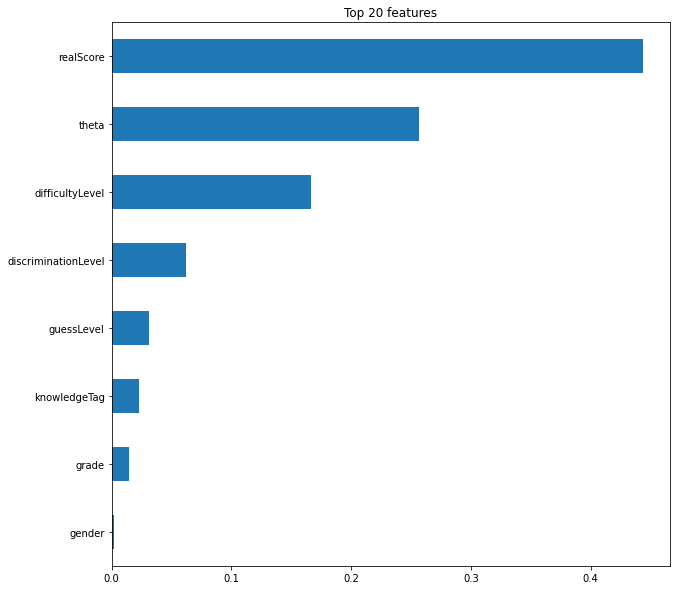

In [49]:
# 특성 중요도
rf = pipe3.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
importances.sort_values()[-n:].plot.barh();

In [52]:
X_train2 = X_train.drop('gender',axis=1)
X_val2 = X_val.drop('gender',axis=1)

In [53]:
pipe4 = make_pipeline(
    RandomForestClassifier(n_jobs=-1, random_state=54, oob_score=True, max_depth=20, min_samples_leaf=2,min_samples_split =4, n_estimators=52, max_features=0.7273335939652188)
)

pipe4.fit(X_train2, y_train)

y_pred4 = pipe4.predict(X_val2)

print('Random Forest 검증 정확도: ', accuracy_score(y_val, y_pred4))

Random Forest 검증 정확도:  0.9245730597221673


In [58]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 7.1 MB/s 


In [66]:
pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.0 MB 117 kB/s 
     |████████████████████████████████| 13.1 MB 40.2 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=794c17f764ae94d2af8c4fc8a3ab9ad3dc44e641d3d6e11b0f857377c12561ca
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.1.0 requires matplotlib>=3.2.0, but you have matplotlib 3.1.1 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5

In [67]:
import xgboost
import shap
import matplotlib.pyplot as plt 
from pdpbox.pdp import pdp_isolate, pdp_plot

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7eff78403d90>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7eff783e45d0>})

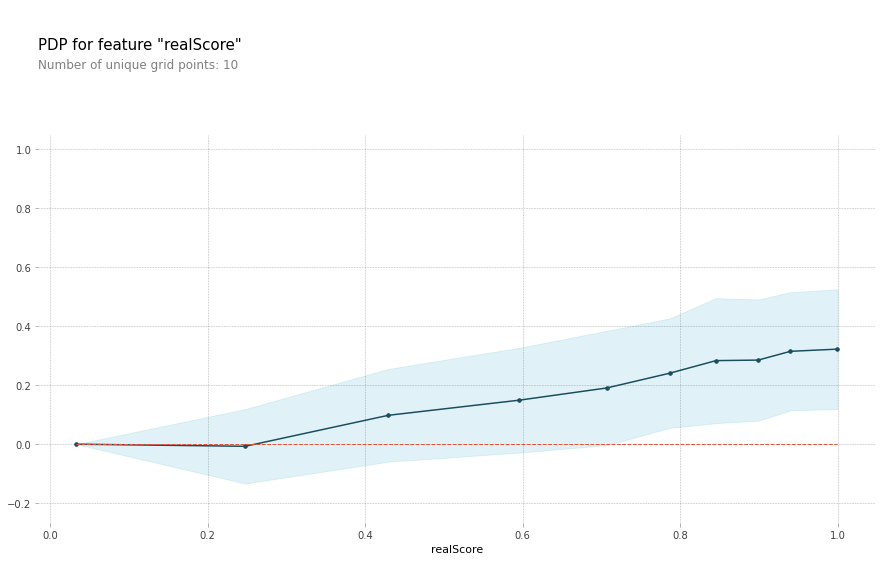

In [72]:
feature = 'realScore'

isolated = pdp_isolate(model=pipe3,
                       dataset=X_train,
                       model_features= X_val.columns,
                       feature = feature)
pdp_plot(isolated, feature_name = feature)

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7eff7832b150>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7eff78370b50>})

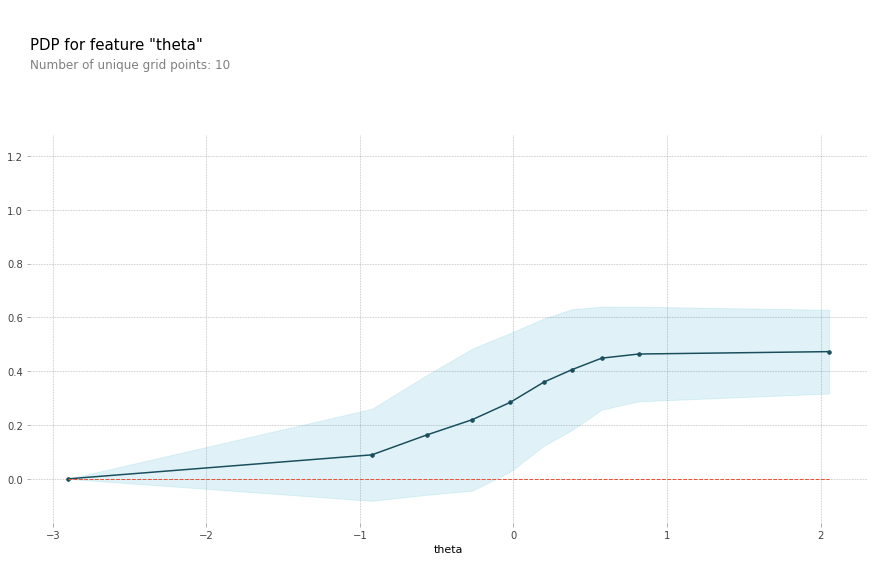

In [74]:
feature = 'theta'

isolated2 = pdp_isolate(model=pipe3,
                       dataset=X_train,
                       model_features= X_val.columns,
                       feature = feature)
pdp_plot(isolated2, feature_name = feature)

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7eff782fcad0>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7eff7834e9d0>})

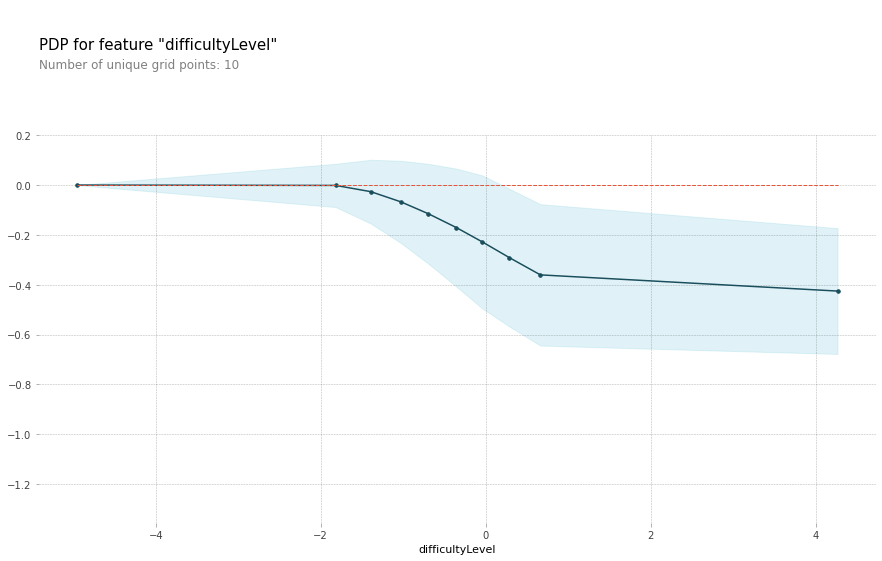

In [75]:
feature = 'difficultyLevel'

isolated3 = pdp_isolate(model=pipe3,
                       dataset=X_train,
                       model_features= X_val.columns,
                       feature = feature)
pdp_plot(isolated3, feature_name = feature)

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7eff782790d0>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7eff782767d0>})

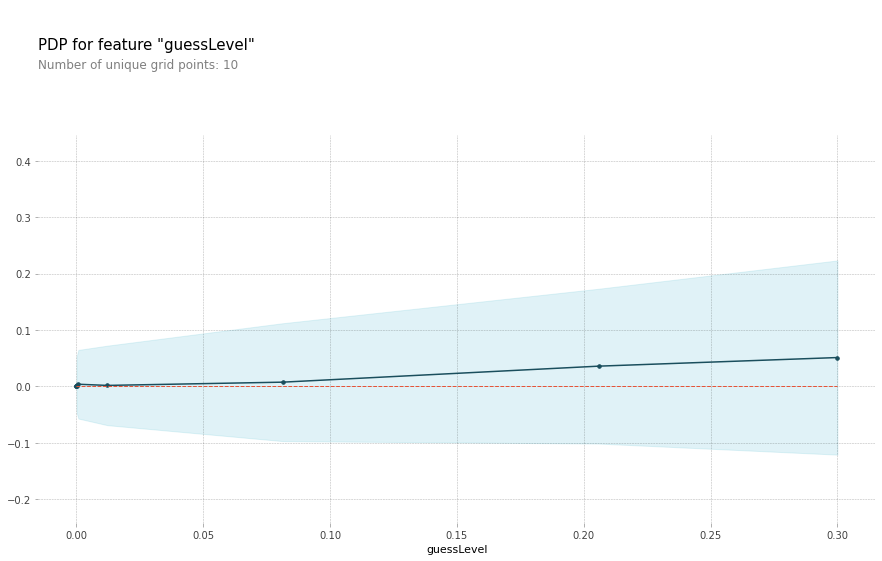

In [76]:
feature = 'guessLevel'

isolated4 = pdp_isolate(model=pipe3,
                       dataset=X_train,
                       model_features= X_val.columns,
                       feature = feature)
pdp_plot(isolated4, feature_name = feature)

In [ ]:
import shap